In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_exchange = pd.read_parquet("exchangerates.parquet")

In [3]:
df_exchange['year'] = df_exchange['date'].dt.year
df_exchange['month'] = df_exchange['date'].dt.month

In [4]:
# subset the data for last 3 years
df_exchange_sub = df_exchange[df_exchange.year>=2022]

In [5]:
df_exchange_sub.date.min()

Timestamp('2022-01-01 00:00:00')

In [6]:
def check_percentage_change(data_frame,start_date,end_date,list_of_currencies):
    
    sub_data_frame = data_frame[(data_frame.date>=start_date) & (data_frame.date<end_date)]
    
    #select the first and last row
    
    top_row_data = sub_data_frame.iloc[[0,-1]]
    
    output = pd.DataFrame()
        
    for currency in list_of_currencies:
        col_name = "myr_"+currency
        top_row_vals = list(top_row_data[col_name])
        perc_change = round((top_row_vals[1]-top_row_vals[0])/top_row_vals[0]*100,2)
        temp_data = pd.DataFrame({"start_date":start_date,
                    "end_date":end_date,
                    "time_frame":start_date+"-"+end_date,
                    "currency":col_name,
                    "percentage_change":perc_change}, index=[0])
        output=pd.concat([output, temp_data], ignore_index=True)
    
    return output
        
    

In [7]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

def create_plots(data_frame):
    
    colors = ['red' if c < 0 else 'green' for c in data_frame['percentage_change']]

    # Create the bar chart
    plt.figure(figsize=(20, 6))
    bars = plt.bar(data_frame['currency'], data_frame['percentage_change'], color=colors)
    
    title = "Percentage change for top currencies in the timeframe "+ data_frame.time_frame.unique()[0]
    
    
    plt.xlabel('Currencies')
    plt.ylabel('Percentage Change')
    plt.title(title)
    plt.xticks(data_frame['currency'])
    plt.axhline(0, color='gray', linewidth=0.5)  # Add a horizontal line at 0
    addlabels(data_frame['currency'], data_frame['percentage_change'])

    # Add legends
    plt.legend(handles=[bars[0], bars[1]])

    # Show the chart
    return plt.show()
    
    

In [8]:
# To analyse the change in price we check 4 timeframes

#YTD: From 2022-01-01 to 2022-31-12
#2022 - 2023: From 2022-01-01 to 2023-01-01
#2022 - 2024: From 2022-01-01 to Present Date
#Monthly Day1 Change of price

/var/folders/w6/t8r5gc3550d9297ww0k4wxcm0000gn/T/ipykernel_1988/2218001260.py:24: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x1200b1b50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(handles=[bars[0], bars[1]])
/var/folders/w6/t8r5gc3550d9297ww0k4wxcm0000gn/T/ipykernel_1988/2218001260.py:24: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x1200b1e50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(handles=[bars[0], bars[1]])


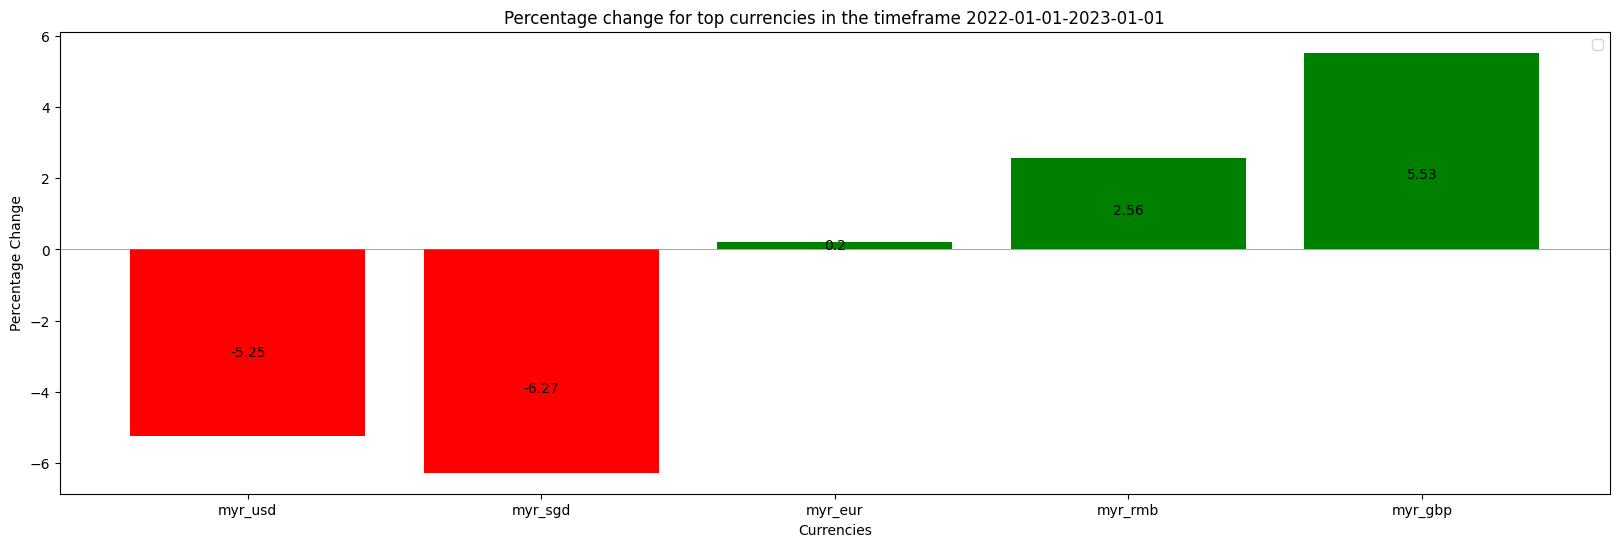

In [9]:
create_plots(check_percentage_change(df_exchange_sub,'2022-01-01','2023-01-01',["usd","sgd","eur","rmb","gbp"]))

/var/folders/w6/t8r5gc3550d9297ww0k4wxcm0000gn/T/ipykernel_1988/2218001260.py:24: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x12020ee80> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(handles=[bars[0], bars[1]])
/var/folders/w6/t8r5gc3550d9297ww0k4wxcm0000gn/T/ipykernel_1988/2218001260.py:24: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x12021d190> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(handles=[bars[0], bars[1]])


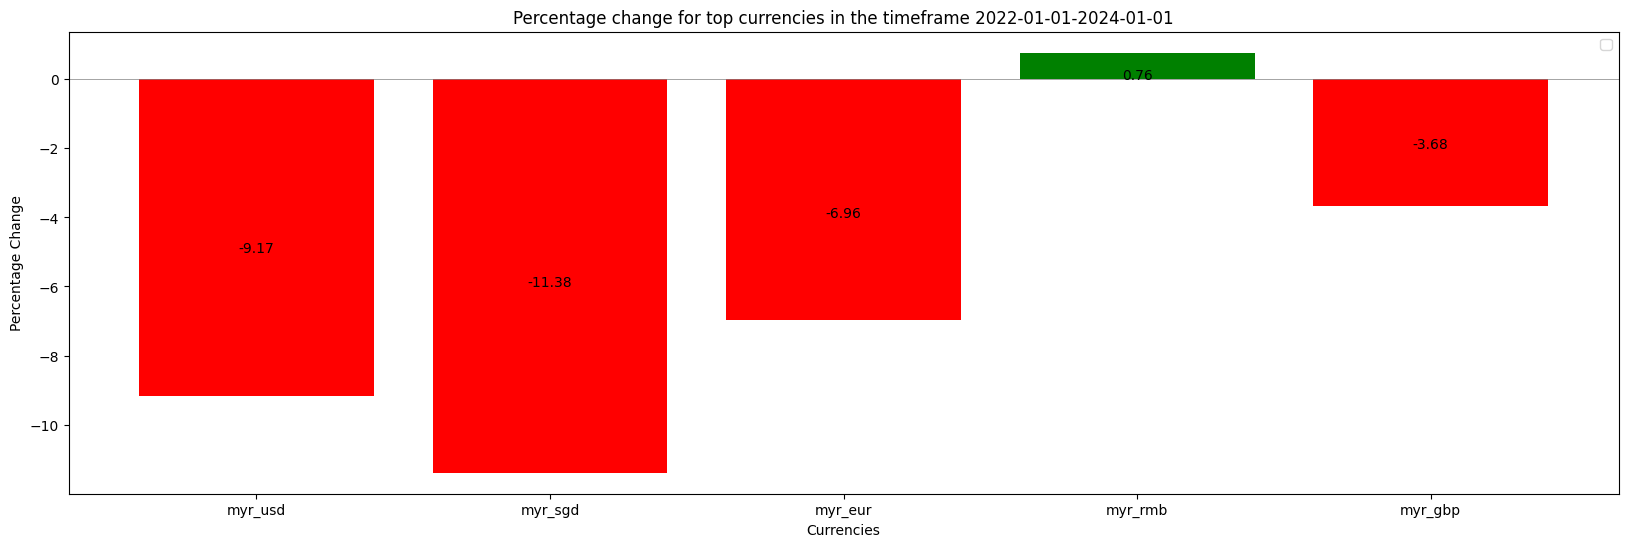

In [10]:
create_plots(check_percentage_change(df_exchange_sub,'2022-01-01','2024-01-01',["usd","sgd","eur","rmb","gbp"]))

/var/folders/w6/t8r5gc3550d9297ww0k4wxcm0000gn/T/ipykernel_1988/2218001260.py:24: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x120293130> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(handles=[bars[0], bars[1]])
/var/folders/w6/t8r5gc3550d9297ww0k4wxcm0000gn/T/ipykernel_1988/2218001260.py:24: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x120293400> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(handles=[bars[0], bars[1]])


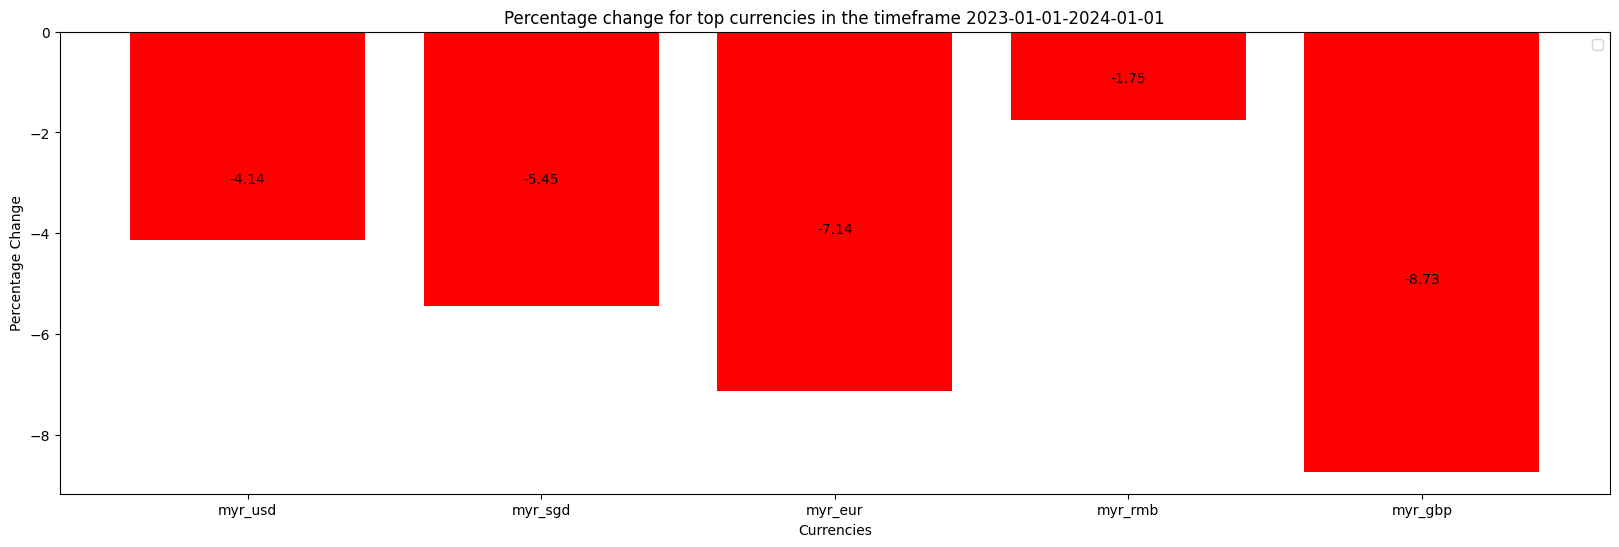

In [11]:
create_plots(check_percentage_change(df_exchange_sub,'2023-01-01','2024-01-01',["usd","sgd","eur","rmb","gbp"]))

/var/folders/w6/t8r5gc3550d9297ww0k4wxcm0000gn/T/ipykernel_1988/2218001260.py:24: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x1203040a0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(handles=[bars[0], bars[1]])
/var/folders/w6/t8r5gc3550d9297ww0k4wxcm0000gn/T/ipykernel_1988/2218001260.py:24: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x120304370> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(handles=[bars[0], bars[1]])


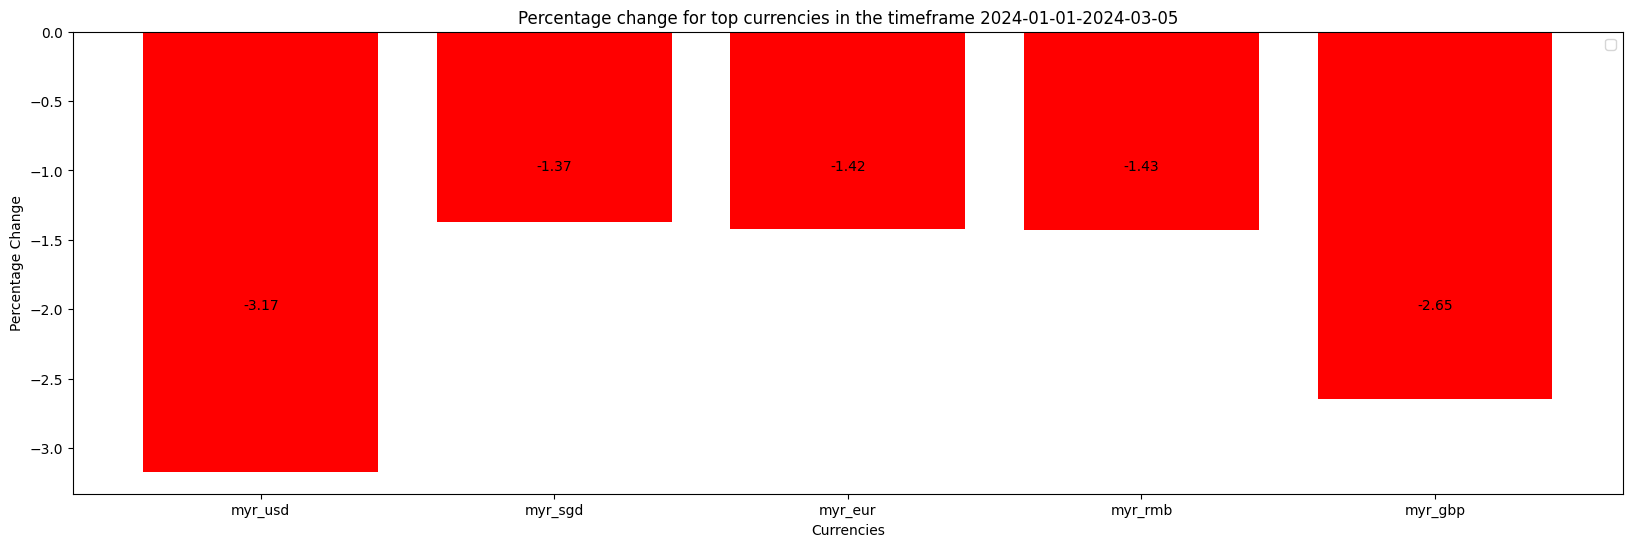

In [12]:
create_plots(check_percentage_change(df_exchange_sub,'2024-01-01','2024-03-05',["usd","sgd","eur","rmb","gbp"]))

In [13]:
def check_percentage_change_monthly(data_frame,list_of_currencies,date_list_freq):
    
    date_list = pd.DataFrame({"date":pd.date_range(data_frame.date.min(),data_frame.date.max(), freq=date_list_freq)})
    df_monthly=pd.merge(data_frame,date_list,how="inner",left_on="date",right_on="date")
    
    output = []
        
    for currency in list_of_currencies:
        col_name = "myr_"+currency
        pct_change_monthly = df_monthly[col_name].pct_change()
        merged_df = pd.merge(pd.DataFrame(df_monthly.date),pct_change_monthly,left_index=True, right_index=True)
        
        output.append(merged_df)
    
    dfs = [df.set_index('date') for df in output]
    
    return pd.DataFrame(pd.concat(dfs, axis=1)).reset_index()

In [14]:
output_df=check_percentage_change_monthly(df_exchange_sub,["usd","rmb","gbp","eur","sgd"],"MS")

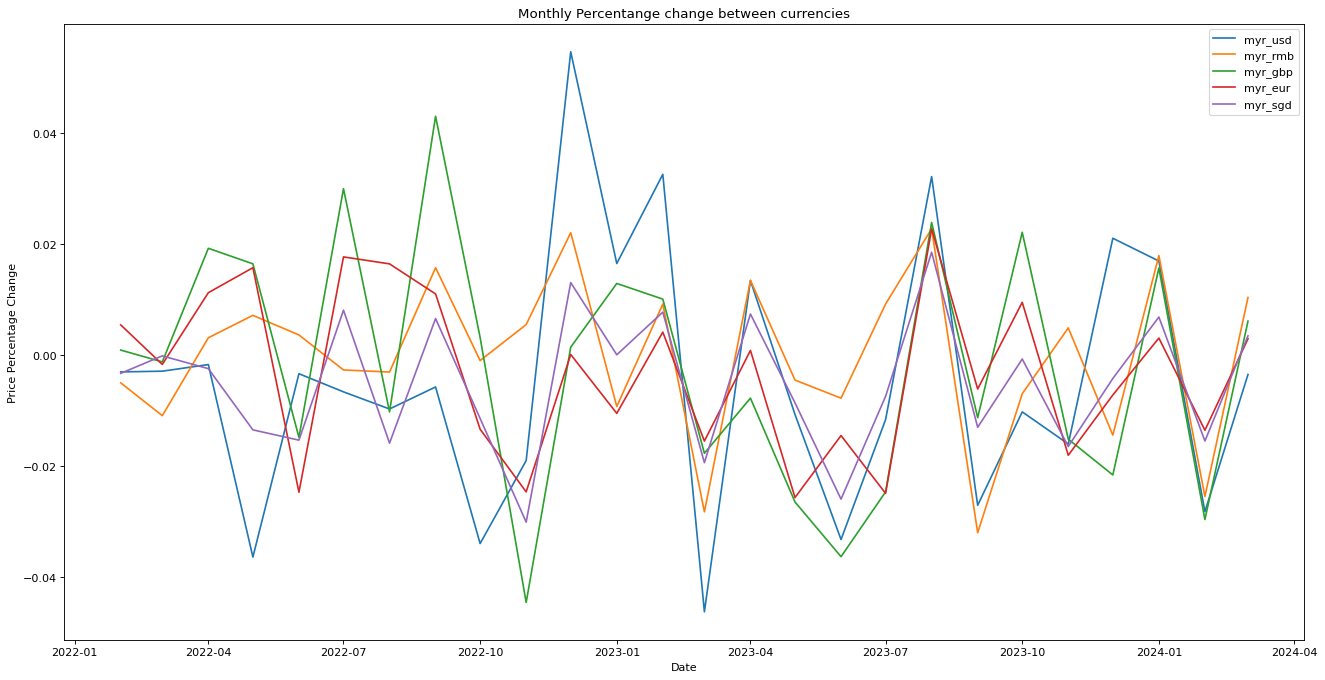

In [15]:
plt.figure(figsize=(20, 10), dpi=80)
for column in output_df.columns:
    if "date" not in column:
        plt.plot(output_df['date'], output_df[column], label = column)
plt.title('Monthly Percentange change between currencies')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price Percentage Change')

plt.show()